# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [25]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [17]:
print(data.shape)
print()
print(data.info())
print()
print(data.duplicated().values.any())
print()
print(data.isna().values.any())

(5391, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None

False

False


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [21]:
cols = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
for col in cols:
    data[col] = data[col].str.replace('$','')
    data[col] = data[col].str.replace(',','')
    data[col] = pd.to_numeric(data[col])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [23]:
data.Release_Date = pd.to_datetime(data.Release_Date)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [31]:
print(f'Average production budget: {data.USD_Production_Budget.mean():.2f}')
print(f'Average Worldwide Gross: {data.USD_Worldwide_Gross.mean():.2f}')
print(f'Minimums: Worldwide: {data.USD_Worldwide_Gross.min():.2f}, Domestic: {data.USD_Domestic_Gross.min():.2f}')
print('Bottom 25% ?')
print(f'Maximums: Budget: {data.USD_Production_Budget.max()}, Worldwide: {data.USD_Worldwide_Gross.max():.2f}, Domestic: {data.USD_Domestic_Gross.max():.2f}')
print()
data.describe()

Average production budget: 31113737.58
Average Worldwide Gross: 88855421.96
Minimums: Worldwide: 0.00, Domestic: 0.00
Bottom 25% ?
Maximums: Budget: 425000000, Worldwide: 2783918982.00, Domestic: 936662225.00



Rank  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
count 5,391.00               5,391.00             5,391.00            5,391.00
mean  2,696.00          31,113,737.58        88,855,421.96       41,235,519.44
std   1,556.39          40,523,796.88       168,457,757.00       66,029,346.27
min       1.00               1,100.00                 0.00                0.00
25%   1,348.50           5,000,000.00         3,865,206.00        1,330,901.50
50%   2,696.00          17,000,000.00        27,450,453.00       17,192,205.00
75%   4,043.50          40,000,000.00        96,454,455.00       52,343,687.00
max   5,391.00         425,000,000.00     2,783,918,982.00      936,662,225.00

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [35]:
zero_domestic = data[data.USD_Domestic_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False)
zero_domestic

Rank Release_Date                         Movie_Title  \
5388    96   2020-12-31                         Singularity   
5387   126   2018-12-18                             Aquaman   
5384   321   2018-09-03                   A Wrinkle in Time   
5385   366   2018-10-08                      Amusement Park   
5090   556   2015-12-31  Don Gato, el inicio de la pandilla   
...    ...          ...                                 ...   
4787  5371   2014-12-31                Stories of Our Lives   
3056  5374   2007-12-31                         Tin Can Man   
4907  5381   2015-05-19                    Family Motocross   
5006  5389   2015-09-29             Signed Sealed Delivered   
5007  5390   2015-09-29                A Plague So Pleasant   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5388              175000000                    0                   0  
5387              160000000                    0                   0  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5090               80000000              4547660                   0  
...                     ...                  ...                 ...  
4787                  15000                    0                   0  
3056                  12000                    0                   0  
4907                  10000                    0                   0  
5006                   5000                    0                   0  
5007                   1400                    0                   0  

[512 rows x 6 columns]

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [36]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False)
zero_worldwide

Rank Release_Date              Movie_Title  USD_Production_Budget  \
5388    96   2020-12-31              Singularity              175000000   
5387   126   2018-12-18                  Aquaman              160000000   
5384   321   2018-09-03        A Wrinkle in Time              103000000   
5385   366   2018-10-08           Amusement Park              100000000   
5058   880   2015-11-12         The Ridiculous 6               60000000   
...    ...          ...                      ...                    ...   
4787  5371   2014-12-31     Stories of Our Lives                  15000   
3056  5374   2007-12-31              Tin Can Man                  12000   
4907  5381   2015-05-19         Family Motocross                  10000   
5006  5389   2015-09-29  Signed Sealed Delivered                   5000   
5007  5390   2015-09-29     A Plague So Pleasant                   1400   

      USD_Worldwide_Gross  USD_Domestic_Gross  
5388                    0                   0  
5387                    0                   0  
5384                    0                   0  
5385                    0                   0  
5058                    0                   0  
...                   ...                 ...  
4787                    0                   0  
3056                    0                   0  
4907                    0                   0  
5006                    0                   0  
5007                    0                   0  

[357 rows x 6 columns]

### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [40]:
data.query('USD_Domestic_Gross==0 and USD_Worldwide_Gross!=0')

Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
1579                 7890                   0  
1744             10834406                   0  
2155                63180                   0  
2203              5918742                   0  
...                   ...                 ...  
5340              1480089                   0  
5348             58807172                   0  
5360                27561                   0  
5372             48048527                   0  
5374                36630                   0  

[155 rows x 6 columns]

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [41]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [45]:
print(data[data.Release_Date > scrape_date].shape)
data_clean =data[data.Release_Date < scrape_date]
data_clean.shape

(7, 6)


(5384, 6)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [47]:
lost_money = data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
lost_money

Rank Release_Date                       Movie_Title  \
1     5140   1916-05-09                       Intolerance   
6     4630   1927-12-08                             Wings   
8     4240   1930-01-01                     Hell's Angels   
15    4738   1936-05-02                      Modern Times   
17    4814   1936-10-20  Charge of the Light Brigade, The   
...    ...          ...                               ...   
5371  4901   2017-07-28            An Inconvenient Sequel   
5373  2161   2017-08-25                       Tulip Fever   
5374  4237   2017-08-25              Polina danser sa vie   
5381    94   2017-12-05  King Arthur: Legend of the Sword   
5383  2521   2017-12-31                The Thousand Miles   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
1                    385907                    0                   0  
6                   2000000                    0                   0  
8                   4000000                    0                   0  
15                  1500000               165049              163245  
17                  1200000                    0                   0  
...                     ...                  ...                 ...  
5371                1000000               130874              130874  
5373               25000000                    0                   0  
5374                4000000                36630                   0  
5381              175000000            140012608            39175066  
5383               20000000                    0                   0  

[2007 rows x 6 columns]

# Seaborn for Data Viz: Bubble Charts

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



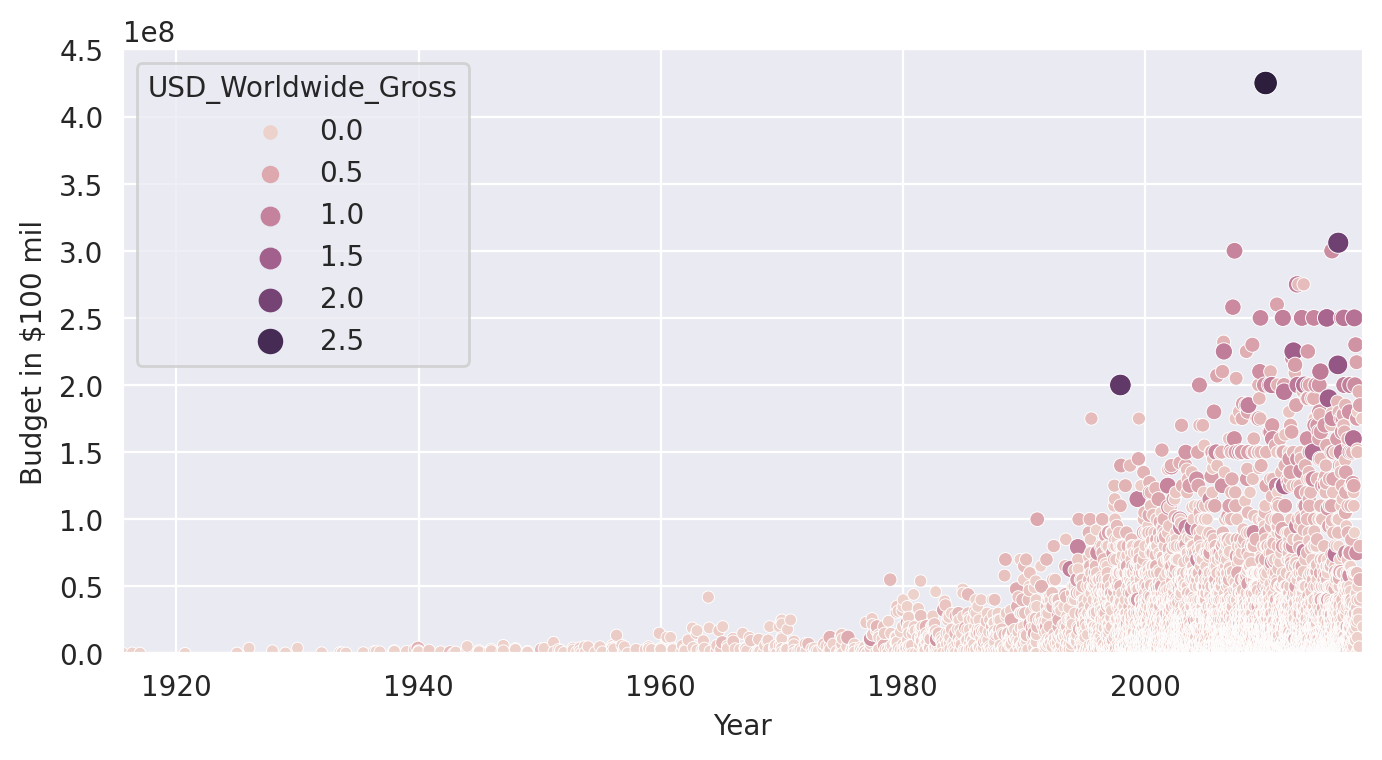

In [50]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
    x='Release_Date',
    y='USD_Production_Budget',
    hue='USD_Worldwide_Gross',
    size='USD_Worldwide_Gross')

    ax.set(ylim=(0, 450_000_000),
        xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
        xlabel= 'Year',
        ylabel = 'Budget in $100 mil')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [56]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date).year
dt_index = (dt_index//10) * 10
data_clean['Decade'] = dt_index
data_clean.head() 

Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
0             11000000            10000000    1910  
1                    0                   0    1910  
2              8000000             8000000    1910  
3              3000000             3000000    1920  
4             22000000            11000000    1920

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [64]:
old_films = data_clean[data_clean.Decade < 1970]
new_films = data_clean[data_clean.Decade >= 1970]
print(old_films.shape)
print(new_films.shape)
idx = old_films.USD_Production_Budget.idxmax()
print(old_films.loc[idx])

(153, 7)
(5231, 7)
Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Decade                                  1960
Name: 109, dtype: object


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

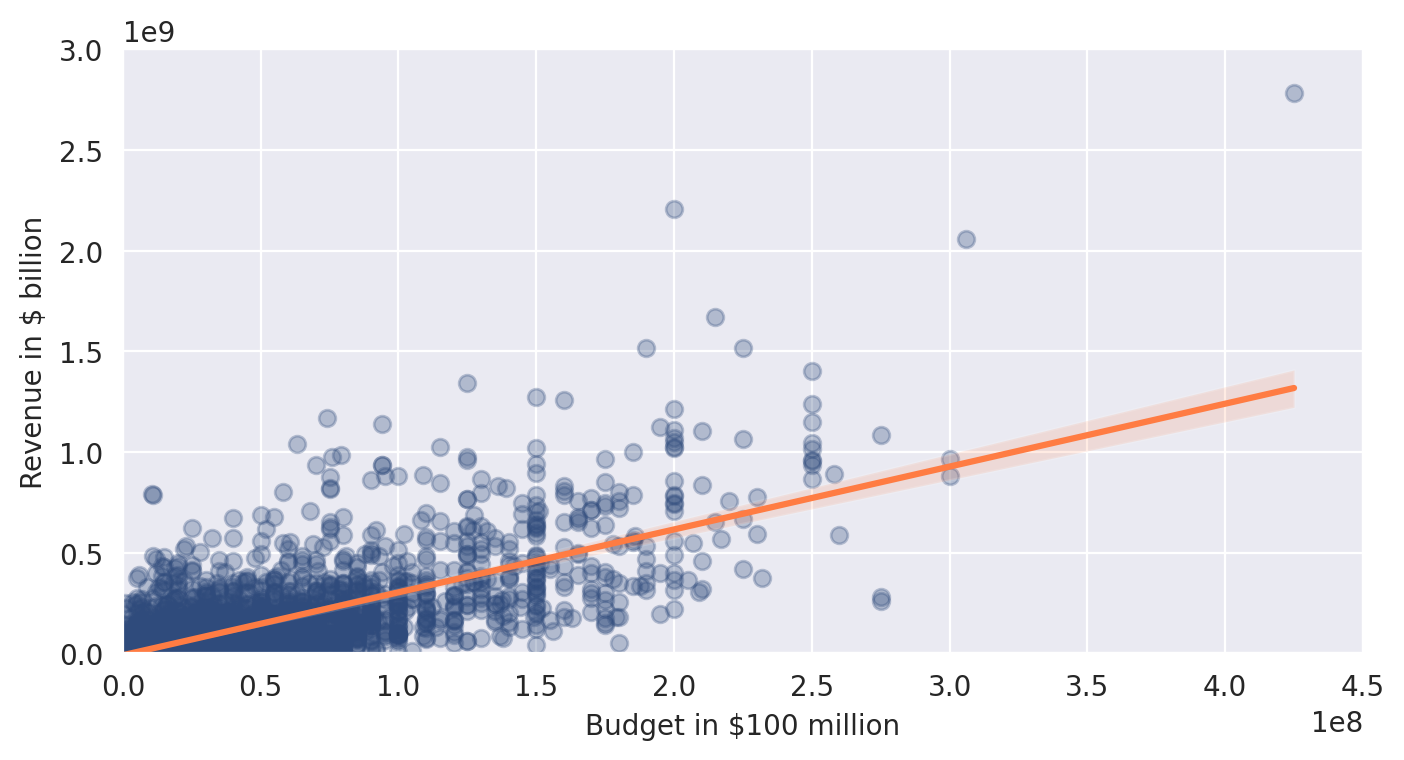

In [65]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=new_films,
            x = 'USD_Production_Budget',
            y = 'USD_Worldwide_Gross',
            color = '#2f4b7c',
            scatter_kws={'alpha': 0.3},
            line_kws={'color': '#ff7c43'})

    ax.set(ylim=(0, 3_000_000_000),
            xlim=(0, 450_000_000),
            xlabel = 'Budget in $100 million',
            ylabel = 'Revenue in $ billion')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [76]:
regression = LinearRegression()
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f'Slope Coef: {regression.coef_[0]}')
print(f'Intercept: {regression.intercept_[0]}')
print(f'r-squared: {regression.score(X,y)}')

Slope Coef: [1.64771314]
Intercept: 22821538.635080386
r-squared: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [84]:
budg = 350_000_000
rev_est = regression.intercept_[0] + regression.coef_[0,0] * budg
print(f'estimated revenue: ${round(rev_est, -6):.10}')

estimated revenue: $600000000.0
